# Agglomerative Clustering

Taken from https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [1]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline

In [2]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

(6, 2)


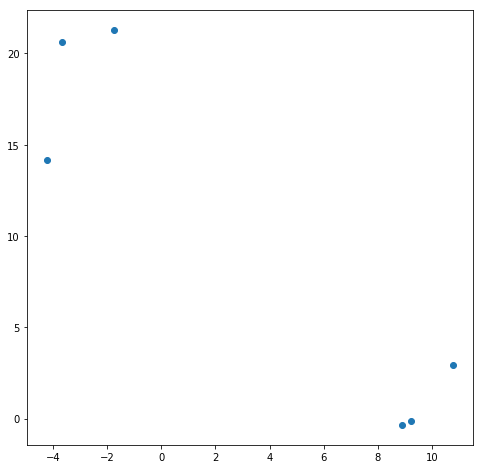

In [3]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[3,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[3,])
X = np.concatenate((a, b),)
print X.shape  # 6 samples with 2 dimensions
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.show()

Use 'linkage' to perform agglomerative clustering

In [4]:
# generate the linkage matrix
Z = linkage(X, 'single')

Scoring the clustering quality

In [5]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.98241218886123782

Examine clusters.  Each row of `Z` represent one iteration.  

Z[i][0] the first datapoint (or cluster)
Z[i][1] the second datapoint (or cluster)
Z[i][2] distance
Z[i][3] total number of data points in the ith cluster


If Z[i][0] >= len(X), then it Z[i][0] = Z[i][0] - len(X). 

In [6]:
Z

array([[  0.     ,   1.     ,   0.37305,   2.     ],
       [  3.     ,   5.     ,   2.00117,   2.     ],
       [  2.     ,   6.     ,   3.4727 ,   3.     ],
       [  4.     ,   7.     ,   6.50094,   3.     ],
       [  8.     ,   9.     ,  18.70324,   6.     ]])

Visualization

In [11]:
def find_idx(Z, idx, D, n):
    idx1 = Z[idx][0]
    idx2 = Z[idx][1]
    
    if (idx1 >= n): 
        find_idx(Z, int(idx1)-n, D, n)
    else:
        D.append(int(idx1))
    if (idx2 >= n):
        find_idx(Z, int(idx2)-n, D, n)
    else:
        D.append(int(idx2))

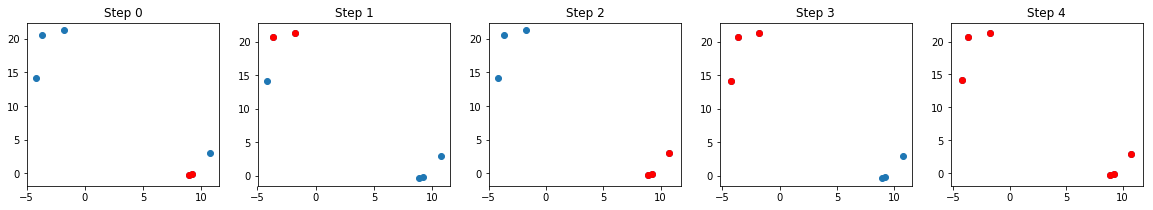

In [12]:
plt.figure(figsize=(20,3))
n = len(X)
for i in range(len(Z)):
    plt.subplot(1,5,i+1)    
    D = []
    find_idx(Z, i, D, n)
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(X[D,0], X[D,1], c='r')
    plt.title('Step %d' % i)
plt.show()

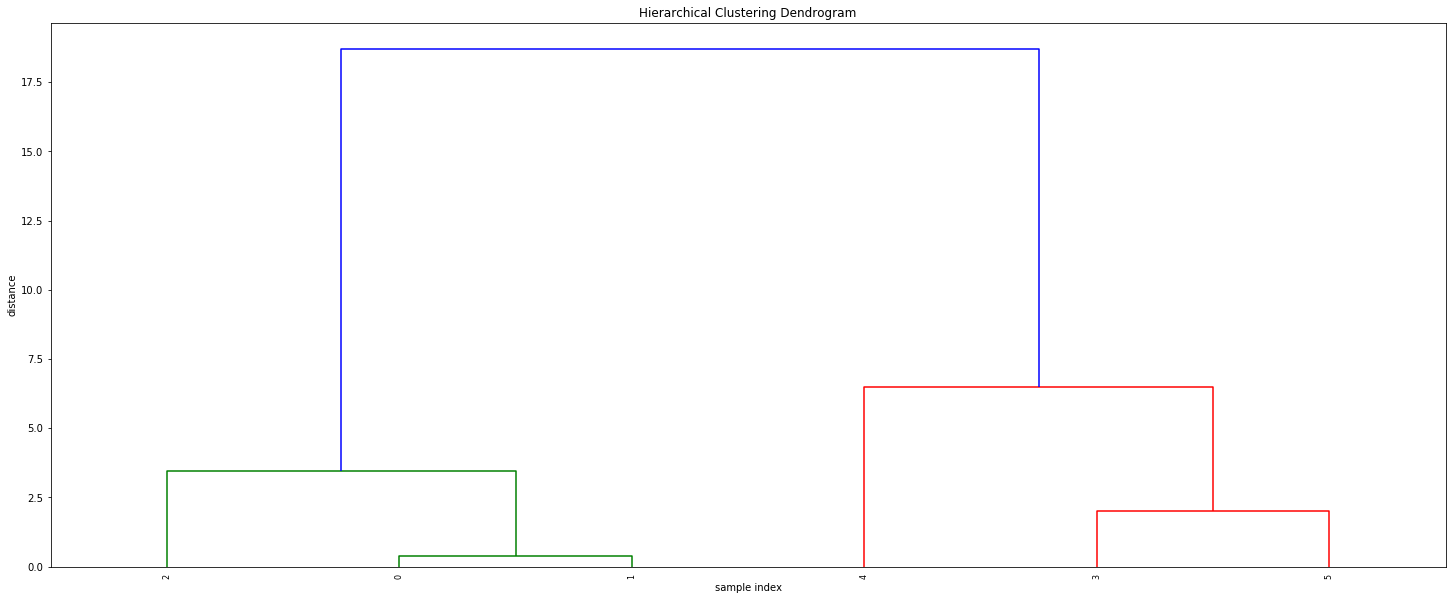

In [13]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [14]:
print Z[14]

D = []
find_idx(Z, 14, D)
print D

IndexError: index 14 is out of bounds for axis 0 with size 5

In [15]:
Z[:20]

array([[  0.     ,   1.     ,   0.37305,   2.     ],
       [  3.     ,   5.     ,   2.00117,   2.     ],
       [  2.     ,   6.     ,   3.4727 ,   3.     ],
       [  4.     ,   7.     ,   6.50094,   3.     ],
       [  8.     ,   9.     ,  18.70324,   6.     ]])